### [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)

Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used in machine learning. It is used to reduce the number of features in a dataset while retaining the most important information. This is done by projecting the data onto a lower-dimensional subspace that maximizes the variance of the data.

In order to realise that PCA actually works 😅 we will try finding the best fit line for a 2-dimensional data using PCA.

**PCA Algorithm**

PCA algorithm consists of the following steps:

1. Standardize the data.
2. Compute the covariance matrix of the data.
3. Compute the eigenvectors and eigenvalues of the covariance matrix.
4. Sort the eigenvectors by decreasing eigenvalues.
5. Select the top k eigenvectors to form the projection matrix.
6. Project the data onto the lower-dimensional subspace.
7. Return the projected data.

**Optional Task** 

Understand the proof of correctness of PCA algorithm. Please reach out the mentors if you need any help.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def data1():
    x = [np.random.rand() for i in range(1000)]
    y = [x[i] + 0.05*np.random.rand() for i in range(1000)]
    return [x, y]

def data2():
    x = [np.random.rand() for i in range(1000)]
    y = [(x[i])**2 + 0.05*np.random.rand() for i in range(1000)]
    return [x, y]

# Standardisation of Data
def std_data(nparray):
    # Implement standardisation of data
    data_x=np.array(nparray[0])
    data_y=np.array(nparray[1])
    mean_x=np.mean(data_x, axis=0)
    std_x=np.std(data_x, axis=0)
    mean_y=np.mean(data_y, axis=0)
    std_y=np.std(data_y, axis=0)
    standardised_data_x=(data_x-mean_x)/std_x
    standardised_data_y=(data_y-mean_y)/std_y
    return [standardised_data_x,standardised_data_y],mean_x,mean_y,std_x,std_y

In [24]:

def DimReduction(arr):
    data_set = np.array(arr)
    #standardisation of data.
    std_data_set,mean_x,mean_y ,std_x,std_y= std_data(data_set)
    std_data_set=np.array(std_data_set)
    covX=np.dot(std_data_set,std_data_set.T)*1/(std_data_set.shape[0]-1)

    eigen_values, eigen_vectors=np.linalg.eig(covX)
   

    sorted_indices = np.argsort(eigen_values)[::-1]  # Indices of eigenvalues sorted in descending order
    sorted_eigenvalues = eigen_values[sorted_indices]
    sorted_eigenvectors = eigen_vectors[:, sorted_indices]
    # Implement PCA and find the best fit line, using slope and intercept

    top_eigen_vector=sorted_eigenvectors[:,:1]
    
    m = top_eigen_vector[1]/top_eigen_vector[0]
    c = mean_y-m*mean_x
    ##since the data set's best fit line will pass through the means of the original data.
    #y=mx+c

    
    
    # Displaying the result using matplotlib
    plt.scatter(data_set[0], data_set[1], color = "green")
    plt.plot(std_data_set[0], std_data_set[0]*m + c,color="yellow")
    print("Slope =", m, "Intercept =", c)
    plt.title("Best Fit Line")
    plt.xlim(-0.2,1.2)
    plt.ylim(-0.2,1.2)
    plt.show()

Slope = [1.] Intercept = [0.02528811]


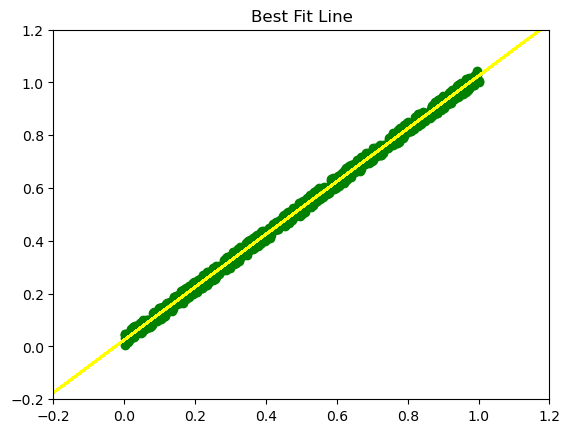

Slope = [1.] Intercept = [-0.14227092]


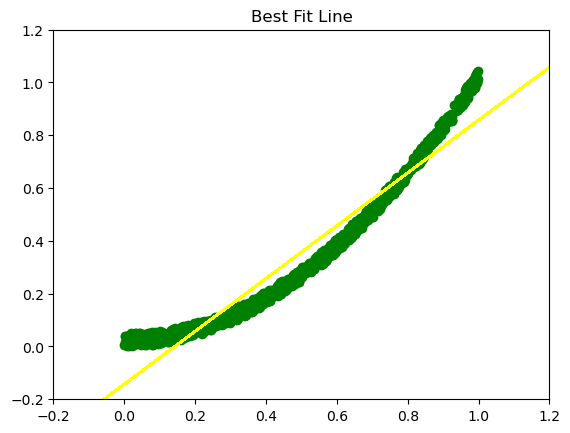

In [26]:
DimReduction(data1())
DimReduction(data2())